<a href="https://colab.research.google.com/github/VishakBharadwaj94/guess_the_game/blob/master/sports_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [0]:
folder = 'cricket'
file = 'cricket.csv'

In [0]:
folder = 'basketball'
file = 'basketball.csv'

In [0]:
folder = 'football'
file = 'football.csv'

In [0]:
folder = 'tennis'
file = 'tennis.txt'

In [0]:
path = Path('data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest)

In [0]:
classes = ['cricket','football','basketball','tennis']
for c in classes:
    print(c)
    verify_images(path/c, delete=True)

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

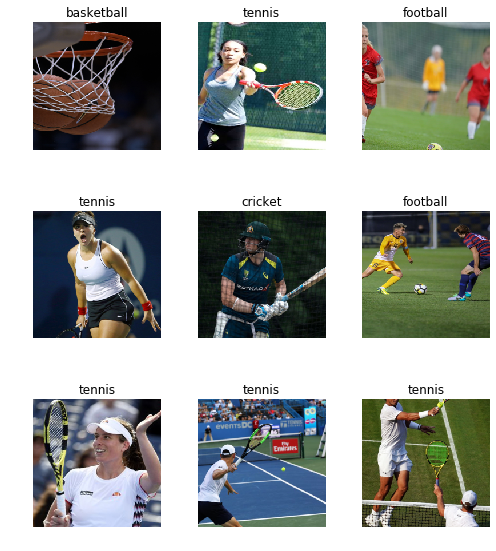

In [28]:

data.show_batch(rows=3, figsize=(7,8))

In [32]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['basketball', 'cricket', 'football', 'tennis'], 4, 2491, 622)

In [33]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 73749091.07it/s]


In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.446992,0.117899,0.054662,03:05
1,0.268013,0.100010,0.041801,03:00
2,0.186253,0.085135,0.035370,02:59
3,0.135237,0.086246,0.030547,02:58


In [0]:
learn.unfreeze()

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


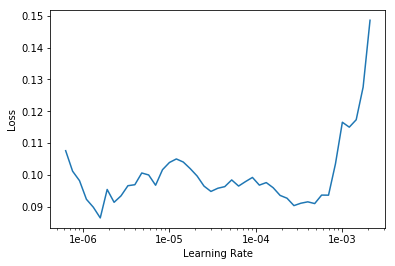

In [48]:
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,2e-6),wd=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,0.079077,0.088469,0.035370,02:59
1,0.082806,0.087953,0.032154,03:01


Error rate for a dataset with no pre-processing, scraped off google images for 4 sports is 3.21%
